# Exponential smoothing

In this assignment you will revisit the payrolls data that we used last week in discussing moving-average smoothing.

This time you will analyze this data and build forecasts using approaches based on *exponential* smoothing, as we discussed in class this week.

## Setup:

#### Import packages

In [1]:
import fredapi
import wrds
import pandas as pd
from statsmodels.formula.api import ols
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.optimize import minimize
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

#### Download data

In [2]:
Fred_API_key_string = open('/home/william/Fred_API_key.txt').read().rstrip()

PAYEMS: Aggregate nonfarm payrolls, seasonally adjusted

PAYNSA: Aggregate nonfarm payrolls, not seasonally adjusted

In [3]:
PAYNSA  = fredapi.Fred(api_key=Fred_API_key_string).get_series('PAYNSA', observation_start = '2020-04-01', observation_end = '2023-12-31', frequency='m', aggregation_method='eop') / 1000
PAYNSA.index = pd.DatetimeIndex(PAYNSA.index.values,freq='MS')
PAYEMS  = fredapi.Fred(api_key=Fred_API_key_string).get_series('PAYEMS', observation_start = '2020-04-01', observation_end = '2023-12-31', frequency='m', aggregation_method='eop') / 1000
PAYEMS.index = pd.DatetimeIndex(PAYEMS.index.values,freq='MS')

#### Visualize raw data

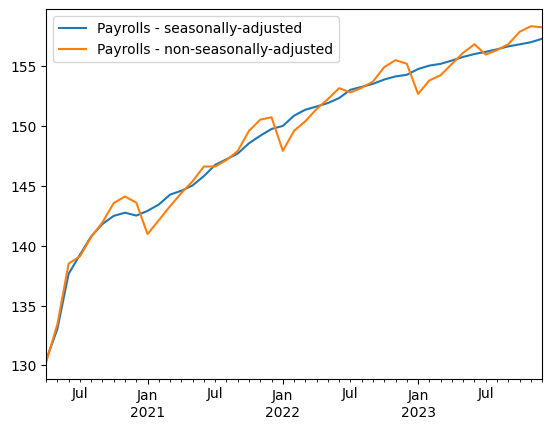

In [4]:
PAYEMS.plot(legend=True,label="Payrolls - seasonally-adjusted");
PAYNSA.plot(legend=True,label="Payrolls - non-seasonally-adjusted");

## Assignment:

### Question 1:

Using statsmodels, fit a simple exponential smoothing algorithm to the seasonally-adjusted series. Print the estimated smoothing parameter $\alpha$ as well as the sum of squared errors (SSE). Plot the fitted values against the actual data. How do each of these results tell you that the SES algorithm is *not* a good one to use in forecasting this series?

In [5]:
SES_results = ExponentialSmoothing(PAYEMS,trend=None,seasonal=None).fit()

In [6]:
SES_results.params['smoothing_level']

0.9999999850988388

In [7]:
SES_results.sse

42.56772796207595

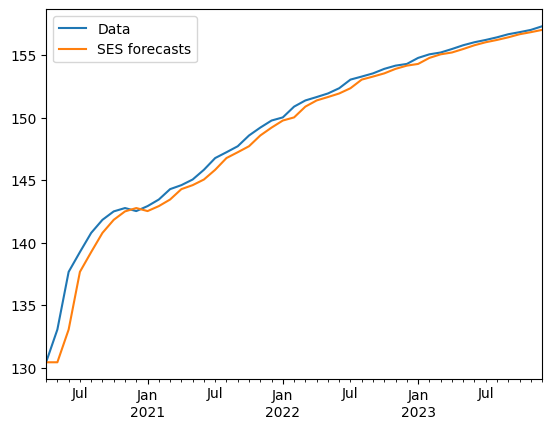

In [8]:
PAYEMS.plot(legend=True,label="Data");
SES_results.fittedvalues.plot(legend=True,label="SES forecasts");

### Question 2:

Using statsmodels, fit a *double* exponential smoothing algorithm to the seasonally-adjusted series. Print the estimated smoothing parameters $\alpha$ and $\beta$, as well as the sum of squared errors (SSE). Plot the fitted values against the actual data. Compared with the results from question 1, what makes us more comfortable using this algorithm to forecast this series? Plot a forecast of this series for the next 12 months.

In [9]:
DES_results = ExponentialSmoothing(PAYEMS,trend='additive',seasonal=None).fit()

In [10]:
DES_results.params

{'smoothing_level': 0.8242493092443403,
 'smoothing_trend': 0.82424930924434,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 127.0016488763964,
 'initial_trend': 3.32563496570219,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [11]:
DES_results.sse

13.300819501801472

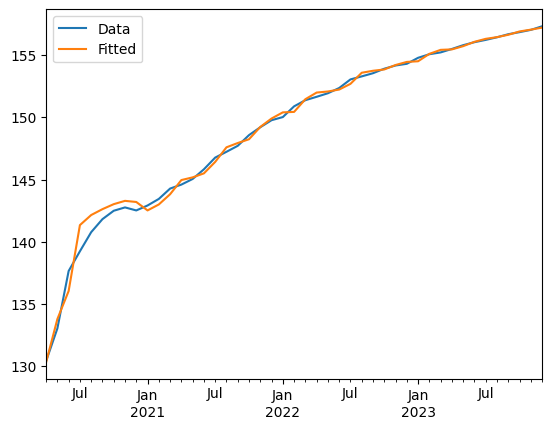

In [12]:
PAYEMS.plot(legend=True,label="Data");
DES_results.fittedvalues.plot(legend=True,label="Fitted");

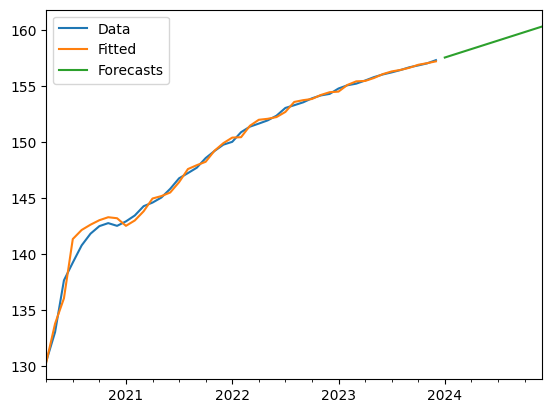

In [13]:
PAYEMS.plot(legend=True,label="Data");
DES_results.fittedvalues.plot(legend=True,label="Fitted");
DES_results.forecast(12).plot(legend=True,label="Forecasts");

### Question 3:

Using statsmodels, fit a double exponential smoothing algorithm to the *non*-seasonally-adjusted series. Print the estimated smoothing parameters $\alpha$ and $\beta$, as well as the sum of squared errors (SSE). Plot the fitted values against the actual data. Why should we *not* be comfortable using this algorithm to forecast the series?

In [14]:
DES_results = ExponentialSmoothing(PAYNSA,trend='additive',seasonal=None).fit()

In [15]:
print("alpha = " + '%5.4f' % DES_results.params['smoothing_level'])
print("beta = " + '%5.4f' % DES_results.params['smoothing_trend'])

alpha = 1.0000
beta = 0.0000


In [16]:
DES_results.sse

72.55030731821324

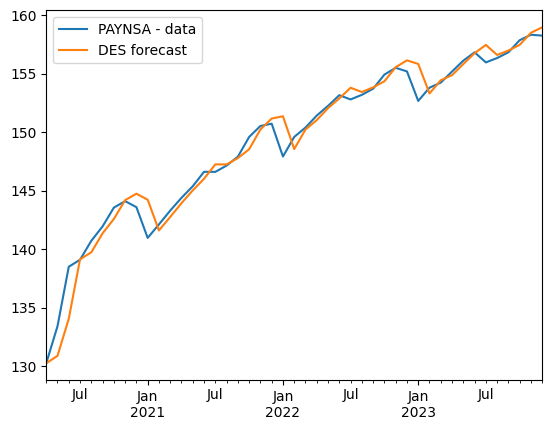

In [17]:
PAYNSA.plot(legend=True,label="PAYNSA - data");
DES_results.fittedvalues.plot(legend=True,label="DES forecast");

### Question 4:

Using statsmodels, fit a *triple* exponential smoothing algorithm (a.k.a. Holt-Winters) to the non-seasonally-adjusted series. Print the estimated smoothing parameters $\alpha$, $\beta$, and $\delta$, as well as the sum of squared errors (SSE). Plot the fitted values against the actual data. Compared with the results from question 3, what makes us more comfortable using this algorithm to forecast the series? Plot a forecast of htis series for the next 12 months.

In [18]:
TES_results = ExponentialSmoothing(PAYNSA,trend='additive',seasonal='additive').fit()

In [19]:
print("alpha = " + '%5.4f' % TES_results.params['smoothing_level'])
print("beta = " + '%5.4f' % TES_results.params['smoothing_trend'])
print("delta = " + '%5.4f' % TES_results.params['smoothing_seasonal'])

alpha = 1.0000
beta = 0.6179
delta = 0.0000


In [20]:
TES_results.sse

10.526163800288375

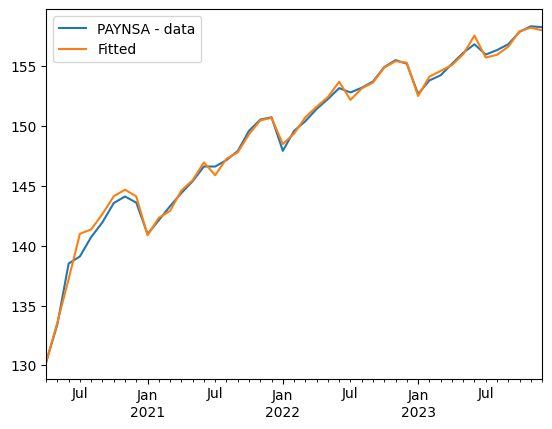

In [21]:
PAYNSA.plot(legend=True,label="PAYNSA - data");
TES_results.fittedvalues.plot(legend=True,label="Fitted");

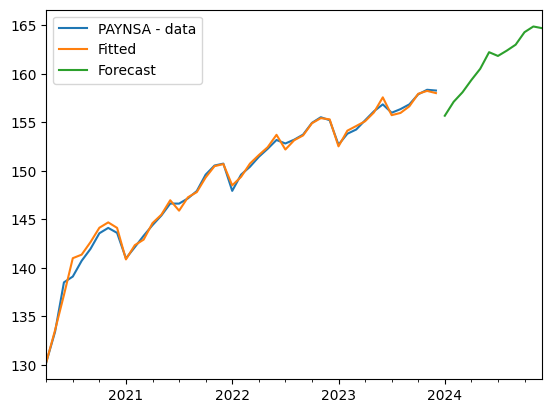

In [22]:
PAYNSA.plot(legend=True,label="PAYNSA - data");
TES_results.fittedvalues.plot(legend=True,label="Fitted");
TES_results.forecast(12).plot(legend=True,label="Forecast");